In [14]:
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

import json

In [15]:
with open("/home/arsenii/Documents/PYTHON/RNASeqAnalysis/reports/train_result_sex_xgboost.json", 'r') as file:
    data = json.load(file)
train_dict = data
train_dict

{'None': {'chr_aXY': {'mean_auc': 0.9998381324076906,
   'mean_accuracy': 0.9910044977511244,
   'mean_f1': 0.990909090909091,
   'mean_precision': 0.9879154078549849,
   'mean_recall': 0.993920972644377,
   'n_features': 50},
  'chr_aX': {'mean_auc': 0.9989388680059711,
   'mean_accuracy': 0.9970014992503748,
   'mean_f1': 0.9969604863221885,
   'mean_precision': 0.9969604863221885,
   'mean_recall': 0.9969604863221885,
   'n_features': 50},
  'chr_aY': {'mean_auc': 0.9995413751551231,
   'mean_accuracy': 0.9895052473763118,
   'mean_f1': 0.9893778452200304,
   'mean_precision': 0.9878787878787879,
   'mean_recall': 0.9908814589665653,
   'n_features': 50},
  'autosomes': {'mean_auc': 0.8378985989460621,
   'mean_accuracy': 0.7541229385307346,
   'mean_f1': 0.7492354740061162,
   'mean_precision': 0.7538461538461538,
   'mean_recall': 0.7446808510638298,
   'n_features': 50}},
 'BRAIN0': {'chr_aXY': {'mean_auc': 0.9996313015952951,
   'mean_accuracy': 0.9940029985007496,
   'mean_f1':

In [16]:
with open("/home/arsenii/Documents/PYTHON/RNASeqAnalysis/reports/eval_result_sex_xgboost.json", 'r') as file:
    data = json.load(file)
eval_dict = data

In [17]:
# CAGE_EVAL = {    
#     "CAGE.HEART": {
#         "chr_aXY": {
#             "mean_auc": 0.9974025974025974,
#             "mean_accuracy": 0.9711538461538461,
#             "mean_f1": 0.9722222222222222,
#             "mean_precision": 0.9905660377358491,
#             "mean_recall": 0.9545454545454546,
#             "n_features": 6
#         },
#         "chr_aX": {
#             "mean_auc": 0.9871521335807051,
#             "mean_accuracy": 0.9375,
#             "mean_f1": 0.9400921658986175,
#             "mean_precision": 0.9532710280373832,
#             "mean_recall": 0.9272727272727272,
#             "n_features": 9
#         },
#         "chr_aY": {
#             "mean_auc": 0.9945269016697589,
#             "mean_accuracy": 0.9519230769230769,
#             "mean_f1": 0.9537037037037037,
#             "mean_precision": 0.9716981132075472,
#             "mean_recall": 0.9363636363636364,
#             "n_features": 9
#         },
#         "autosomes": {
#             "mean_auc": 0.9554730983302411,
#             "mean_accuracy": 0.8653846153846154,
#             "mean_f1": 0.8793103448275862,
#             "mean_precision": 0.8360655737704918,
#             "mean_recall": 0.9272727272727272,
#             "n_features": 20
#         }
#     }}

# train_dict["CAGE.HEART"] = CAGE_EVAL["CAGE.HEART"]
# eval_dict["CAGE.HEART"] = CAGE_EVAL["CAGE.HEART"]

In [18]:
# # TOTAL, HEART, BRAIN0, BRAIN1
# TOTAL_df = pd.DataFrame.from_dict(TOTAL)
# HEART_df = pd.DataFrame.from_dict(HEART)
# # BLOOD1_df = pd.DataFrame.from_dict(BLOOD1)
# BRAIN0_df = pd.DataFrame.from_dict(BRAIN0)
# BRAIN1_df = pd.DataFrame.from_dict(BRAIN1)
# TOTAL_df

TOTAL_df = pd.DataFrame.from_dict(train_dict['None'])
HEART_df = pd.DataFrame.from_dict(train_dict['HEART'])
# CAGE_HEART_df = pd.DataFrame.from_dict(train_dict['CAGE.HEART'])
BRAIN0_df = pd.DataFrame.from_dict(train_dict['BRAIN0'])
BRAIN1_df = pd.DataFrame.from_dict(train_dict['BRAIN1'])
TOTAL_df

,chr_aXY,chr_aX,chr_aY,autosomes
mean_auc,0.999838,0.998939,0.999541,0.837899
mean_accuracy,0.991004,0.997001,0.989505,0.754123
mean_f1,0.990909,0.996960,0.989378,0.749235
mean_precision,0.987915,0.996960,0.987879,0.753846
mean_recall,0.993921,0.996960,0.990881,0.744681
n_features,50.000000,50.000000,50.000000,50.000000


<Axes: >

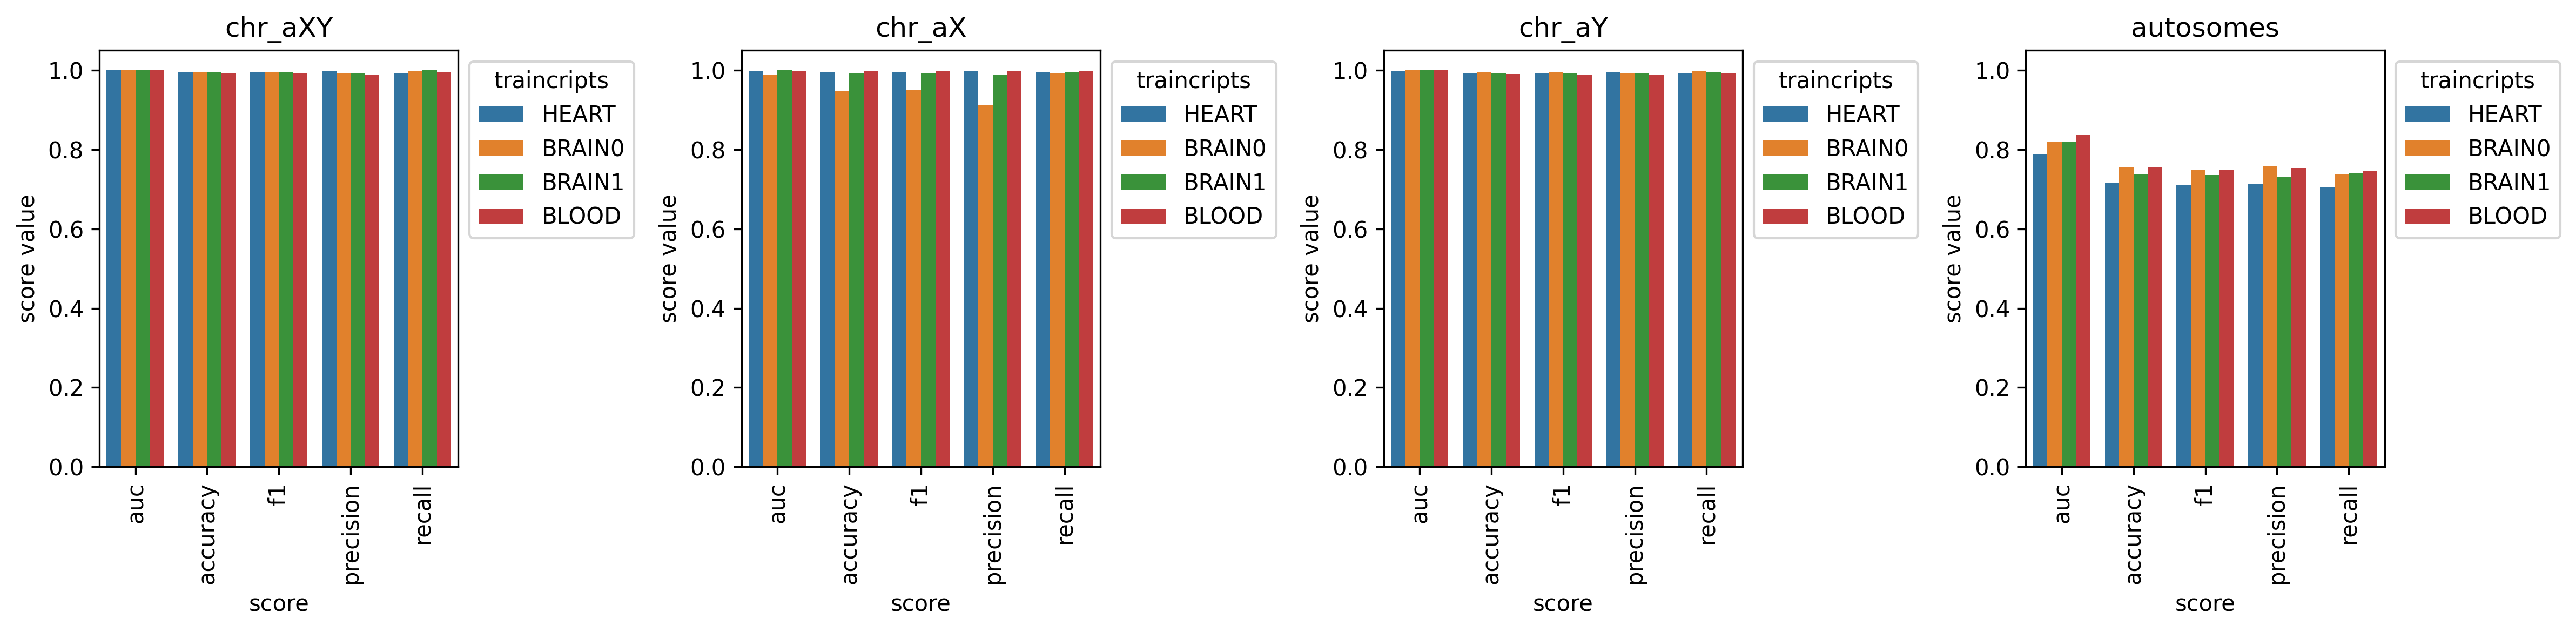

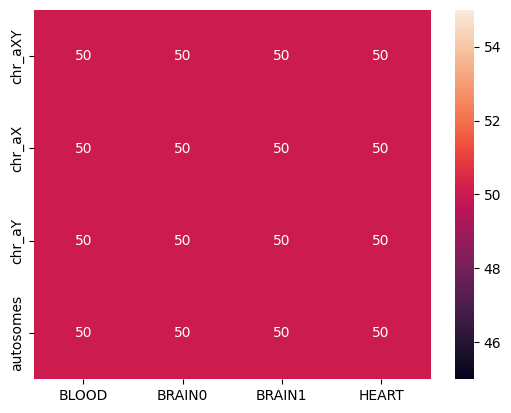

In [19]:
sex_chromosome_names = {
    'chr_aXY': 'chr_aXY',
    'autosomes': "autosomes",
    'chr_aX': "chr_aX",
    'chr_aY': "chr_aY"
}

organ_names = {
    'BRAIN0': "BRAIN0",
    "HEART": "HEART",
    "BRAIN1": "BRAIN1",
    'None': "BLOOD",
    "CAGE.HEART": "CAGE.HEART"
}

df_features = pd.DataFrame(data=np.zeros((len(sex_chromosome_names.keys()), 
                                          len(organ_names.keys()))), 
                           index=['chr_aXY', 'chr_aX', 'chr_aY', 'autosomes'],
                           columns=["BLOOD", "BRAIN0", "BRAIN1",  'HEART', "CAGE.HEART"], )

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

for ax, chromosome in zip(axs, ['chr_aXY', 'chr_aX', 'chr_aY', 'autosomes']):

    dset = pd.DataFrame(
        np.zeros((len(TOTAL_df.index), len(organ_names.keys()))), 
        columns=("BLOOD", "BRAIN0", "BRAIN1",  'HEART', 'CAGE.HEART'),
        index=TOTAL_df.index
    )
    
    
    # dset['CAGE.HEART']=CAGE_HEART_df[chromosome]
    dset['HEART']=HEART_df[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_df[chromosome]
    dset['BRAIN1']=BRAIN1_df[chromosome]
    dset['BLOOD']=TOTAL_df[chromosome]
    
    # print(chromosome)
    # print(dset.loc['n_features'].values)
    
    
    df_features.loc[chromosome, "HEART"] = HEART_df[chromosome].loc['n_features']
    # df_features.loc[chromosome, "CAGE.HEART"] = CAGE_HEART_df[chromosome].loc['n_features']
    df_features.loc[chromosome, "BRAIN0"] = BRAIN0_df[chromosome].loc['n_features']
    df_features.loc[chromosome, "BRAIN1"] = BRAIN1_df[chromosome].loc['n_features']
    df_features.loc[chromosome, "BLOOD"] = TOTAL_df[chromosome].loc['n_features']
    
    dset = dset.drop(index='n_features')

    dset['score'] = dset.index.str[5:]

    dset = dset.drop(columns=['CAGE.HEART'])

    g = sns.barplot(dset.melt('score').rename(columns={'variable': 'traincripts', 'value': "score value"}),
                    x='score', y='score value', hue='traincripts',
                hue_order=['HEART', 'BRAIN0', 'BRAIN1', "BLOOD"],#, "CAGE.HEART"],
                # hue_order=["BLOOD","CAGE.HEART"],
                ax=ax)
    g.set_ylim(0, 1.05)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(sex_chromosome_names[chromosome])

    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')
df_features = df_features.astype(int)

plt.savefig('../reports/for_paper/train_sex_scores.pdf', dpi=300)

plt.figure()
sns.heatmap(df_features.drop(columns=['CAGE.HEART']), annot=True)

In [20]:
from pathlib import Path
import anndata as ad
from config import FDIR_EXTERNAL, FDIR_INTEMEDIATE, FDIR_PROCESSED, FDIR_RAW

fdir_processed = FDIR_PROCESSED / 'sex'
ml_models_fdir = Path("../models")
model_type = 'xgboost'

organ = 'CAGE.HEART'
# organ = 'HEART'
value_to_predict = 'sex'

with pd.ExcelWriter(f"/home/arsenii/Documents/PYTHON/RNASeqAnalysis/reports/{organ}.transcripts.xlsx", mode='w') as writer:
    for sex_chromosome in ['chr_aXY', 'chr_aX', 'chr_aY', 'autosomes']:

        features_fname = f"{organ}_train_features_{sex_chromosome}_calibration_{organ}.csv"
        features_list = pd.read_csv(ml_models_fdir / model_type / features_fname, dtype=object)
        # features_list['Feature'] = features_list.index
        if "Feature" in features_list.columns:
            features_list.set_index('Feature', inplace=True)
        else:
            features_list['Feature'] = features_list["Unnamed: 0"]
            features_list.set_index('Feature', inplace=True)
            

        adata = ad.read_h5ad(fdir_processed / f'{organ}.preprocessed.{value_to_predict}.h5ad')
        adata = adata[:, adata.varm[sex_chromosome]]

        # (adata[:, features_list.index].var[['geneId', 'transcript_id', 'class']])

        # features_list['Feature'].values
        adata[:, features_list.index].var.to_excel(writer, sheet_name=sex_chromosome)


In [21]:
adata

View of AnnData object with n_obs × n_vars = 208 × 73123
    obs: 'dim1', 'dim2', 'chamber', 'side', 'chambers', 'disease', 'sex', 'batch', 'donor', 'ventricle_like_atrium_samples', 'age'
    var: 'seqnames', 'start', 'end', 'width', 'strand', 'id', 'annotation', 'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId', 'distanceToTSS', 'class', 'seqname', 'transcript_id'
    varm: 'autosomes', 'chr_aX', 'chr_aXY', 'chr_aY', 'unique'
    layers: 'raw'

In [22]:

# HEART_eval_df = pd.DataFrame.from_dict(HEART_eval)
# BRAIN0_eval_df = pd.DataFrame.from_dict(BRAIN0_eval)
# BRAIN1_eval_df = pd.DataFrame.from_dict(BRAIN1_eval)


HEART_eval_df = pd.DataFrame.from_dict(eval_dict['HEART'])
BRAIN0_eval_df = pd.DataFrame.from_dict(eval_dict['BRAIN0'])
BRAIN1_eval_df = pd.DataFrame.from_dict(eval_dict['BRAIN1'])
# CAGE_HEART_eval_df = pd.DataFrame.from_dict(eval_dict['CAGE.HEART'])
BRAIN1_eval_df

,chr_aXY,chr_aX,chr_aY,autosomes
mean_auc,9.949495e-01,9.949495e-01,9.949495e-01,0.520148
mean_accuracy,9.851163e-01,9.860465e-01,9.330233e-01,0.618605
mean_f1,9.891519e-01,9.898482e-01,9.470188e-01,0.746503
mean_precision,1.000000e+00,1.000000e+00,1.000000e+00,0.691530
mean_recall,9.786667e-01,9.800000e-01,9.040000e-01,0.817333
mean_r2,9.294359e-01,9.338462e-01,6.824615e-01,-0.808205
mean_spearmanr,9.663351e-01,9.682811e-01,8.712271e-01,-0.020075
tot_auc,1.000000e+00,1.000000e+00,1.000000e+00,0.520267
tot_accuracy,9.906977e-01,9.906977e-01,9.441860e-01,0.646512
tot_f1,9.932886e-01,9.932886e-01,9.583333e-01,0.780347


In [23]:
BRAIN0_eval_df

,chr_aXY,chr_aX,chr_aY,autosomes
mean_auc,0.994949,0.994949,0.994949,0.717212
mean_accuracy,1.000000,0.988235,1.000000,0.711765
mean_f1,1.000000,0.991667,1.000000,0.791547
mean_precision,1.000000,1.000000,1.000000,0.807037
mean_recall,1.000000,0.984000,1.000000,0.808000
mean_r2,1.000000,0.939556,1.000000,-0.480889
mean_spearmanr,1.000000,0.973520,1.000000,0.289126
tot_auc,1.000000,1.000000,1.000000,0.714667
tot_accuracy,1.000000,1.000000,1.000000,0.764706
tot_f1,1.000000,1.000000,1.000000,0.851852


In [24]:
# CAGE_HEART_eval_df.T
HEART_eval_df = HEART_eval_df.loc[['tot_auc', 'tot_accuracy', 'tot_f1', 'tot_precision', 'tot_recall']]
BRAIN0_eval_df = BRAIN0_eval_df.loc[['tot_auc', 'tot_accuracy', 'tot_f1', 'tot_precision', 'tot_recall']]
BRAIN1_eval_df = BRAIN1_eval_df.loc[['tot_auc', 'tot_accuracy', 'tot_f1', 'tot_precision', 'tot_recall']]


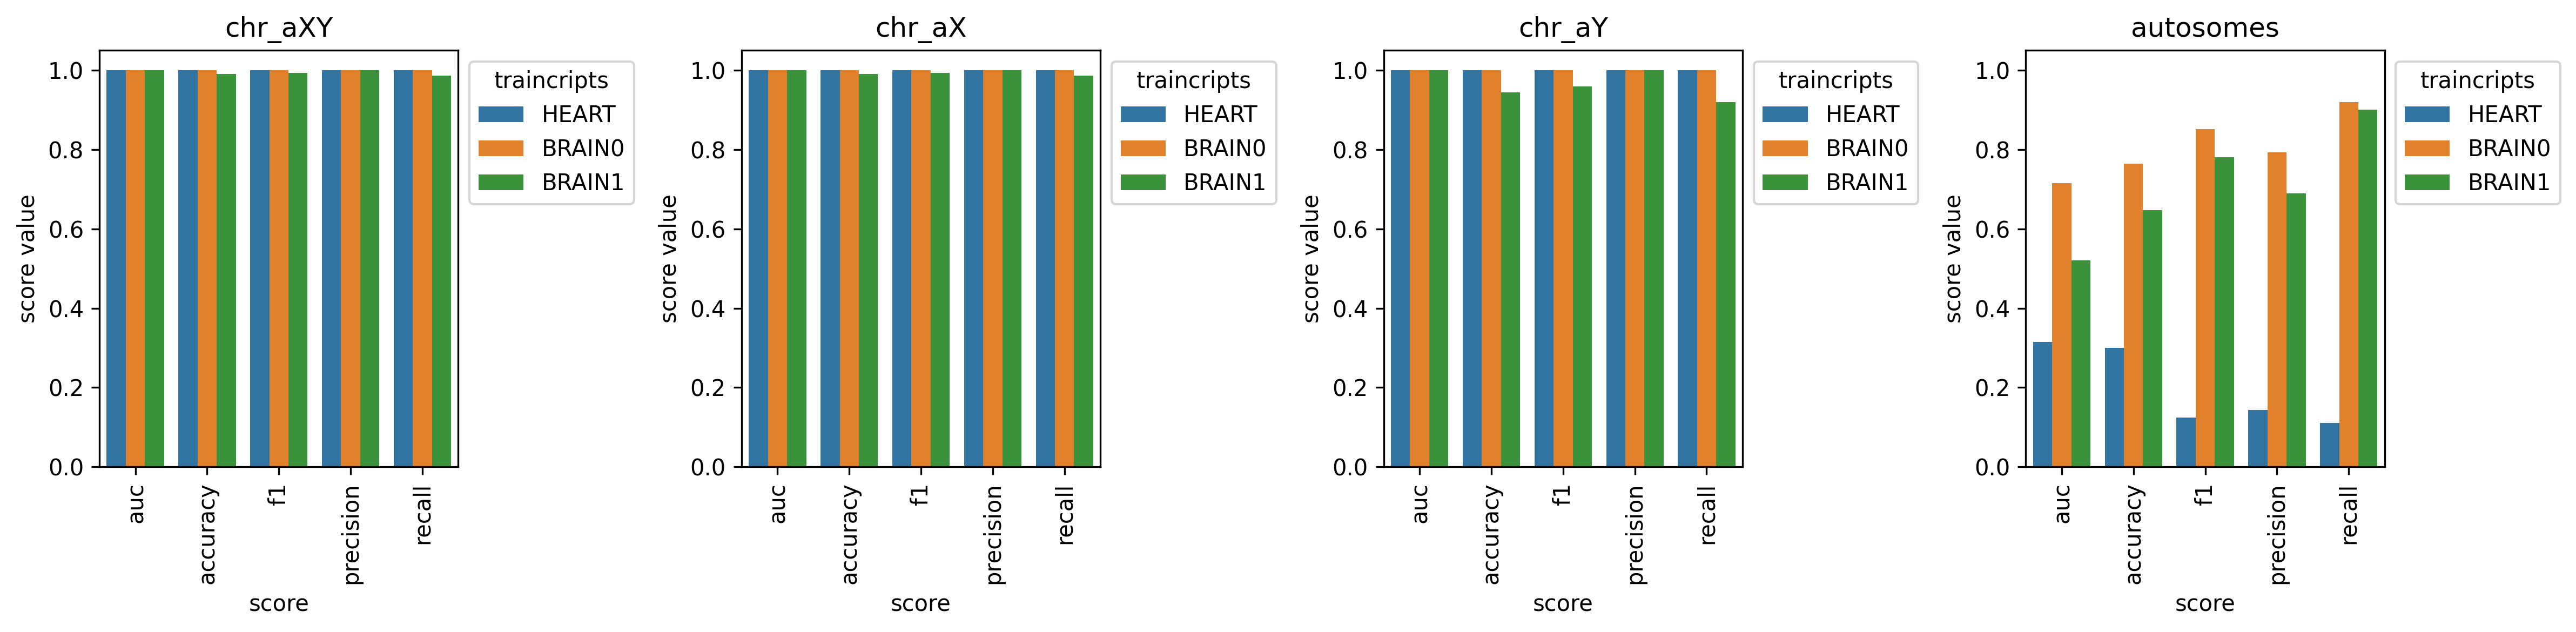

In [27]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

chromosome = 'chr_aXY'
for ax, chromosome in zip(axs, ['chr_aXY', 'chr_aX', 'chr_aY', 'autosomes']):

    dset = pd.DataFrame(
        np.zeros((5,4)), 
        columns=('HEART', "BRAIN0", "BRAIN1", "CAGE.HEART"),
        index=HEART_eval_df.index
    )

    dset['HEART']=HEART_eval_df[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_eval_df[chromosome]
    dset['BRAIN1']=BRAIN1_eval_df[chromosome]
    # dset['CAGE.HEART']=CAGE_HEART_eval_df[chromosome]

    dset['score'] = dset.index.str[4:]
    
    dset = dset.drop(columns='CAGE.HEART')

    g = sns.barplot(dset.melt('score').rename(columns={'variable': 'traincripts', 'value': "score value"}),
                    x='score', y='score value', hue='traincripts',
                hue_order=['HEART', 'BRAIN0', 'BRAIN1'],#, "CAGE.HEART"],
                ax=ax)
    g.set_ylim(0, 1.05)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)   
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()  
    ax.title.set_text(sex_chromosome_names[chromosome])
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')
plt.savefig('../reports/for_paper/eval_sex_scores.pdf', dpi=300)

In [47]:
HEART_eval_df_corr = pd.DataFrame.from_dict(eval_dict['HEART']).loc[['tot_spearman_r']]
BRAIN0_eval_df_corr = pd.DataFrame.from_dict(eval_dict['BRAIN0']).loc[['tot_spearman_r']]
BRAIN1_eval_df_corr = pd.DataFrame.from_dict(eval_dict['BRAIN1']).loc[['tot_spearman_r']]
HEART_eval_df_corr

,chr_aXY,chr_aX,chr_aY,autosomes
tot_spearman_r,1.0,1.0,1.0,-0.453033


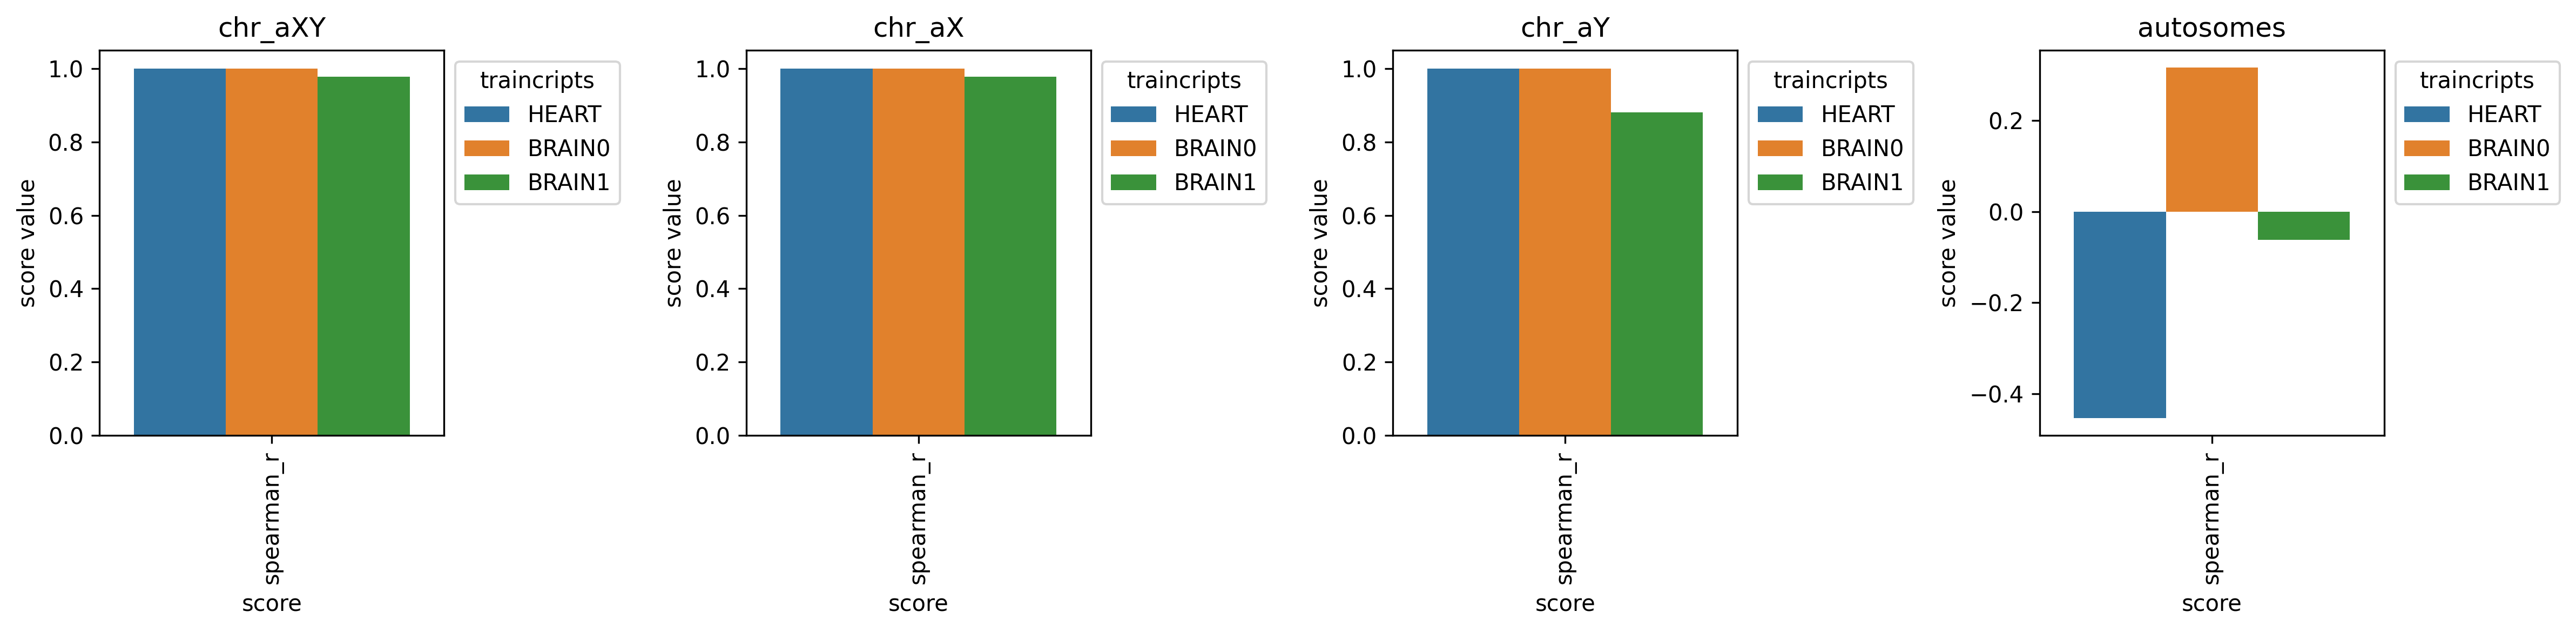

In [49]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

# chromosome = 'chr_aXY'
for ax, chromosome in zip(axs, ['chr_aXY', 'chr_aX', 'chr_aY', 'autosomes']):

    dset = pd.DataFrame(
        np.zeros((1,4)), 
        columns=('HEART', "BRAIN0", "BRAIN1", "CAGE.HEART"),
        index=HEART_eval_df_corr.index
    )

    dset['HEART']=HEART_eval_df_corr[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_eval_df_corr[chromosome]
    dset['BRAIN1']=BRAIN1_eval_df_corr[chromosome]
    # dset['CAGE.HEART']=CAGE_HEART_eval_df[chromosome]

    dset['score'] = dset.index.str[4:]
    
    dset = dset.drop(columns='CAGE.HEART')

    g = sns.barplot(dset.melt('score').rename(columns={'variable': 'traincripts', 'value': "score value"}),
                    x='score', y='score value', hue='traincripts',
                hue_order=['HEART', 'BRAIN0', 'BRAIN1'],#, "CAGE.HEART"],
                ax=ax)
    # g.set_ylim(0, 1.05)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)   
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()  
    ax.title.set_text(sex_chromosome_names[chromosome])
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')
# plt.savefig('../reports/for_paper/eval_sex_scores.pdf', dpi=300)

In [26]:
# FOR BRAIN1 different tissues
tissue_dependence = {
    'Nac': {
        "chrXY": {
            "mean_auc": 0.9677171717171718,
            "mean_accuracy": 0.7323943661971831,
            "mean_f1": 0.7654320987654321,
            "mean_precision": 1.0,
            "mean_recall": 0.62
        },
        "chrX": {
            "mean_auc": 0.8957575757575758,
            "mean_accuracy": 0.3746478873239437,
            "mean_f1": 0.18870056497175142,
            "mean_precision": 0.6,
            "mean_recall": 0.11200000000000002
        },
        "chrY": {
            "mean_auc": 0.9576106519742882,
            "mean_accuracy": 0.6788732394366197,
            "mean_f1": 0.7032946891511501,
            "mean_precision": 1.0,
            "mean_recall": 0.544
        },
        "autosome": {
            "mean_auc": 0.4768080808080808,
            "mean_accuracy": 0.4169014084507042,
            "mean_f1": 0.4753149056058228,
            "mean_precision": 0.6476439022601426,
            "mean_recall": 0.376
        }
    },
    'Putamen': {

        "chrXY": {
            "mean_auc": 0.9721616161616161,
            "mean_accuracy": 0.7694444444444444,
            "mean_f1": 0.8009179575444636,
            "mean_precision": 1.0,
            "mean_recall": 0.668
        },
        "chrX": {
            "mean_auc": 0.9806060606060606,
            "mean_accuracy": 0.35555555555555557,
            "mean_f1": 0.12765918627987594,
            "mean_precision": 0.6,
            "mean_recall": 0.072
        },
        "chrY": {
            "mean_auc": 0.9850505050505052,
            "mean_accuracy": 0.6361111111111112,
            "mean_f1": 0.6420720953198606,
            "mean_precision": 1.0,
            "mean_recall": 0.476
        },
        "autosome": {
            "mean_auc": 0.5728080808080808,
            "mean_accuracy": 0.5444444444444445,
            "mean_f1": 0.6134590237286137,
            "mean_precision": 0.7434997093868062,
            "mean_recall": 0.524
        }
        
    },
    'Caudate': {
        "chrXY": {
            "mean_auc": 0.9784646464646465,
            "mean_accuracy": 0.7583333333333333,
            "mean_f1": 0.7892335894099045,
            "mean_precision": 1.0,
            "mean_recall": 0.652
        },
        "chrX": {
            "mean_auc": 0.8809696969696971,
            "mean_accuracy": 0.36944444444444446,
            "mean_f1": 0.15946763460375074,
            "mean_precision": 0.6,
            "mean_recall": 0.09200000000000001
        },
        "chrY": {
            "mean_auc": 0.9870303030303031,
            "mean_accuracy": 0.65,
            "mean_f1": 0.6583241125660607,
            "mean_precision": 1.0,
            "mean_recall": 0.496
        },
        "autosome": {
            "mean_auc": 0.5087272727272727,
            "mean_accuracy": 0.49444444444444446,
            "mean_f1": 0.56757399377248,
            "mean_precision": 0.6968061452544124,
            "mean_recall": 0.48
        }
    },

    'Putamen+Caudate': {
        "chrXY": {
            "mean_auc": 0.9705050505050505,
            "mean_accuracy": 0.7208333333333334,
            "mean_f1": 0.7479434802394301,
            "mean_precision": 1.0,
            "mean_recall": 0.598
        },
        "chrX": {
            "mean_auc": 0.9175353535353534,
            "mean_accuracy": 0.3666666666666667,
            "mean_f1": 0.15315071402027924,
            "mean_precision": 0.6,
            "mean_recall": 0.08800000000000001
        },
        "chrY": {
            "mean_auc": 0.9880202020202019,
            "mean_accuracy": 0.6208333333333332,
            "mean_f1": 0.6181963549676588,
            "mean_precision": 1.0,
            "mean_recall": 0.454
        },
        "autosome": {
            "mean_auc": 0.5328484848484849,
            "mean_accuracy": 0.4916666666666666,
            "mean_f1": 0.5524016677021202,
            "mean_precision": 0.7108691148363753,
            "mean_recall": 0.45199999999999996
        }
        
    },
    'All': {
        "chrXY": {
            "mean_auc": 0.9748552188552189,
            "mean_accuracy": 0.7386046511627906,
            "mean_f1": 0.7692246249220479,
            "mean_precision": 1.0,
            "mean_recall": 0.6253333333333333
        },
        "chrX": {
            "mean_auc": 0.9071784511784511,
            "mean_accuracy": 0.3693023255813953,
            "mean_f1": 0.1650782724446349,
            "mean_precision": 0.6,
            "mean_recall": 0.096
        },
        "chrY": {
            "mean_auc": 0.9791111111111112,
            "mean_accuracy": 0.6706976744186046,
            "mean_f1": 0.6887986198136304,
            "mean_precision": 1.0,
            "mean_recall": 0.528
        },
        "autosome": {
            "mean_auc": 0.5117979797979797,
            "mean_accuracy": 0.4623255813953488,
            "mean_f1": 0.5188249786843321,
            "mean_precision": 0.6912808446517424,
            "mean_recall": 0.4159999999999999
        }
        
    }
}
tissue_dependence.keys()

dict_keys(['Nac', 'Putamen', 'Caudate', 'Putamen+Caudate', 'All'])

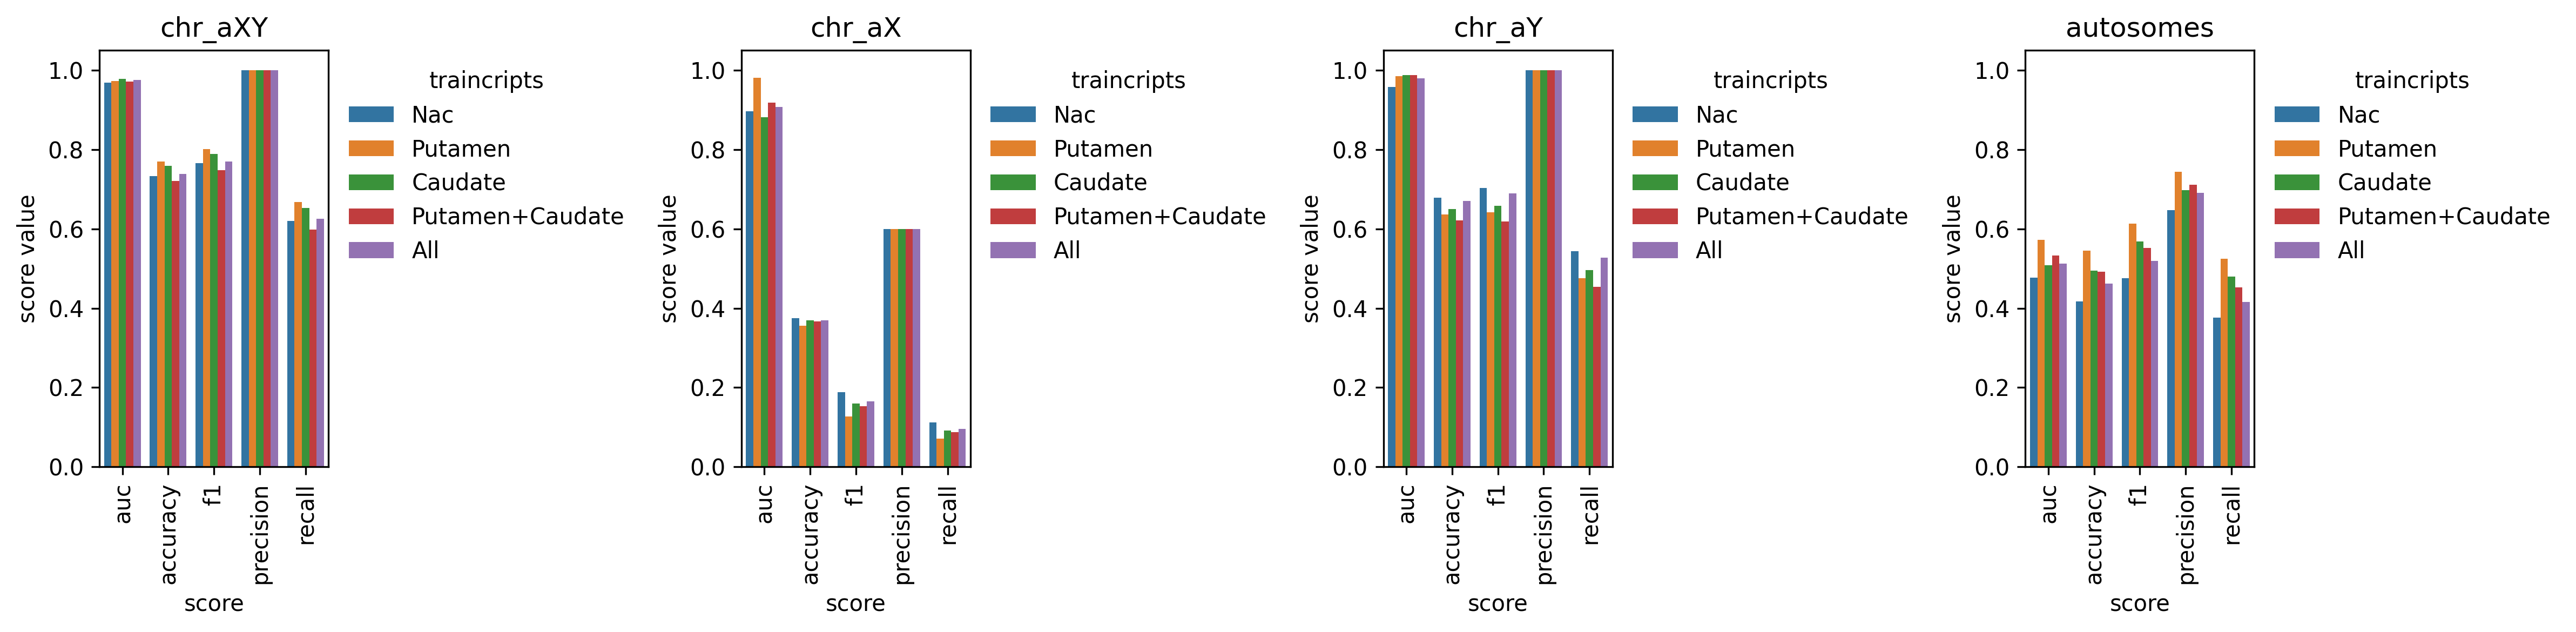

In [27]:
Nac_df = pd.DataFrame.from_dict(tissue_dependence['Nac'])
Putamen_df = pd.DataFrame.from_dict(tissue_dependence['Putamen'])
Caudate_df = pd.DataFrame.from_dict(tissue_dependence['Caudate'])
Putamen_Caudate_df = pd.DataFrame.from_dict(tissue_dependence['Putamen+Caudate'])
All_df = pd.DataFrame.from_dict(tissue_dependence['All'])

sex_chromosome_names = {
    'chrXY': 'chr_aXY',
    'autosome': "autosomes",
    'chrX': "chr_aX",
    'chrY': "chr_aY"
}

df_features = pd.DataFrame(data=np.zeros((4, 5)), 
                           index=['chrXY', 'chrX', 'chrY', 'autosome'],
                           columns=['Nac', 'Putamen', 'Caudate', 'Putamen+Caudate', 'All'], )


fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

i = 0
for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 5)), 
        columns=('Nac', 'Putamen', 'Caudate', 'Putamen+Caudate', 'All'),
        index=Nac_df.index
    )
    i = i+1
    
    dset['Nac']=Nac_df[chromosome]
    dset['Putamen']=Putamen_df[chromosome]
    dset['Caudate']=Caudate_df[chromosome]
    dset['Putamen+Caudate']=Putamen_Caudate_df[chromosome]
    dset['All']=All_df[chromosome]
    
    # print(chromosome)
    # print(dset.loc['n_features'].values)
    
    
    # df_features.loc[chromosome, "Nac"] = Nac_df[chromosome].loc['n_features']
    # df_features.loc[chromosome, "Putamen"] = Putamen_df[chromosome].loc['n_features']
    # df_features.loc[chromosome, "Caudate"] = Caudate_df[chromosome].loc['n_features']
    # df_features.loc[chromosome, "Putamen+Caudate"] = Putamen_Caudate_df[chromosome].loc['n_features']
    # df_features.loc[chromosome, "All"] = All_df[chromosome].loc['n_features']
    # dset = dset.drop(index='n_features')

    dset['score'] = dset.index.str[5:]

    g = sns.barplot(dset.melt('score').rename(columns={'variable': 'traincripts', 'value': "score value"}),
                    x='score', y='score value', hue='traincripts',
                    hue_order=['Nac', 'Putamen', 'Caudate', 'Putamen+Caudate', 'All'],
                    ax=ax)
    g.set_ylim(0, 1.05)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False,)
    plt.tight_layout()
    ax.title.set_text(sex_chromosome_names[chromosome])


#### Why there are no Y transcripts in autosomes+Y

In [28]:
from pathlib import Path

n_featues_dict = {
    'BRAIN0': {
        'chrXY': 10,
        'chrX': 9,
        'chrY': 80,
        'autosome': 91,
    },
    'BRAIN1': {
        'chrXY': 7,
        'chrX': 5,
        'chrY': 5,
        'autosome': 59,
    },
    'HEART': {
        'chrXY': 9,
        'chrX': 8,
        'chrY': 93,
        'autosome': 82,
    },
    'None': {
        'chrXY': 10,
        'chrX': 10,
        'chrY': 3,
        'autosome': 82,
    }
}

fdir_raw = Path("../data/raw/")
fdir_processed = Path("../data/interim")
fdir_traintest = Path("../data/processed") / 'sex'
fdir_external = Path("../data/external")
ml_models_fdir = Path("../models")

model_type = 'xgboost'
value_to_predict = 'Sex'
feature_importance_method = 'SHAP'

organ = ['BRAIN0', "HEART", "BRAIN1", "None"][0]
sex = ['chrXY', 'chrX', 'chrY', 'autosome'][2]

n_features = n_featues_dict[organ][sex]

features_fname = f"geuvadis_train_features_{sex}_calibration_{organ}.csv"
features_list = pd.read_csv(ml_models_fdir / model_type / features_fname, index_col=0)

features = pd.read_hdf(
    fdir_processed / f'feature_importance.{model_type}.{value_to_predict}.organ_{organ}.h5',
    key=f'{sex}',
)

features = features[feature_importance_method]
features = features.sort_values(ascending=False)

features_autos = pd.read_hdf(
    fdir_processed / f'feature_importance.{model_type}.{value_to_predict}.organ_{organ}.h5',
    key='autosome',
)

features_autos = features_autos[feature_importance_method]
features_autos = features_autos.sort_values(ascending=False)

features_list

FileNotFoundError: [Errno 2] No such file or directory: '../models/xgboost/geuvadis_train_features_chrY_calibration_BRAIN0.csv'

In [ ]:
features[features.index.difference(features_autos.index)].sort_values(ascending=False)

Series([], Name: SHAP, dtype: int64)

In [ ]:
from gtfparse import read_gtf
import anndata as ad
import scanpy as sc


fname = next((fdir_external / organ / 'reg').glob("*processed.h5"))
fname = fname.name
data_eval = pd.read_hdf(fdir_external / organ / 'reg' / fname, index_col=0)
data_eval_header = pd.read_csv(fdir_external / organ / 'reg' / 'SraRunTable.txt', sep=',')

gtf_rawdata = read_gtf(fdir_raw / 'all_transcripts_strigtie_merged.gtf')
gtf_data = gtf_rawdata.to_pandas()
gtf_data = gtf_data.set_index('transcript_id')
gtf_data['transcript_id'] = gtf_data.index

gtf_data = gtf_data.loc[data_eval.columns].drop_duplicates("transcript_id")


adata_eval = ad.AnnData(data_eval)
adata_eval.var = gtf_data
adata_eval.obs = data_eval_header



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number', 'gene_name', 'ref_gene_id']


In [ ]:
# adata_eval.var['seqname'].loc[adata_eval.var['seqname'] == 'chrY']
for chrom in (adata_eval.var['seqname'].unique()):
    print(chrom)

chr7
chr12
chr11
chr2
chr6
chr16
chr4
chr3
chr1
chr19
chr17
chr22
chr5
chr8
chr14
chr10
chrX
chr13
chr15
chr20
chr18
chrY
chr9
chr21
chrM
GL000008.2
GL000216.2
KI270728.1
KI270729.1
KI270733.1
GL000208.1
KI270734.1
KI270742.1
KI270744.1
KI270745.1
KI270747.1
GL000214.1
GL000205.2
GL000218.1
GL000219.1
GL000009.2
GL000220.1
GL000224.1
GL000221.1
GL000194.1
GL000225.1
KI270304.1
KI270310.1
GL000195.1
KI270311.1
KI270317.1
KI270330.1
KI270303.1
KI270438.1
KI270442.1
KI270706.1
KI270713.1
KI270709.1
KI270711.1
KI270721.1
KI270720.1
KI270718.1
KI270725.1
KI270727.1


In [ ]:
adata_eval.var.loc[adata_eval.var['seqname'] == 'chrY']

,seqname,source,feature,start,end,score,strand,frame,gene_id,exon_number,gene_name,ref_gene_id,transcript_id
ENST00000155093.8,chrY,StringTie,transcript,2935381,2982770,1000.0,+,0,MSTRG.36722,,ZFY,ENSG00000067646.12,ENST00000155093.8
ENST00000215473.7,chrY,StringTie,transcript,5056088,5101437,1000.0,+,0,MSTRG.36727,,PCDH11Y,ENSG00000099715.15,ENST00000215473.7
ENST00000250784.13,chrY,StringTie,transcript,2841602,2867345,1000.0,+,0,MSTRG.36713,,RPS4Y1,ENSG00000129824.16,ENST00000250784.13
ENST00000284856.4,chrY,StringTie,transcript,13703899,13706094,1000.0,+,0,MSTRG.36790,,TMSB4Y,ENSG00000154620.6,ENST00000284856.4
ENST00000304790.3,chrY,StringTie,transcript,18771814,18773735,1000.0,-,0,MSTRG.36813,,HSFY2,ENSG00000169953.12,ENST00000304790.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSTRG.36843.1,chrY,StringTie,transcript,25461959,25462321,1000.0,NaN,0,MSTRG.36843,,,,MSTRG.36843.1
MSTRG.36852.7,chrY,StringTie,transcript,57073911,57130289,1000.0,+,0,MSTRG.36852,,,,MSTRG.36852.7
MSTRG.36853.2,chrY,StringTie,transcript,57184152,57199646,1000.0,+,0,MSTRG.36853,,,,MSTRG.36853.2
MSTRG.36853.20,chrY,StringTie,transcript,57206737,57212230,1000.0,+,0,MSTRG.36853,,,,MSTRG.36853.20


In [ ]:
## на 50 транскриптах

BLOOD1_50 = dict(
    chrXY = dict(
        mean_auc=0.9415219797037979,
        mean_accuracy=0.8995398945124004,
        mean_f1=0.9013116086450619,
        mean_precision=0.8732248342374923,
        mean_recall=0.9358974358974359,
),
    chrX = dict(
        mean_auc=0.9483713592804501,
        mean_accuracy=0.9040399506228258,
        mean_f1=0.9063514804475666,
        mean_precision=0.8740152681098576,
        mean_recall=0.9451282051282052,
        ),
    chrY = dict(
        mean_auc=0.5755918155918156,
        mean_accuracy=0.5622152395915161,
        mean_f1=0.5692593605588699,
        mean_precision=0.5535460970953927,
        mean_recall=0.5898834498834498,
        ),
    autosome = dict(
        mean_auc=0.7030773939864847,
        mean_accuracy=0.640141398271799,
        mean_f1=0.6511144904471828,
        mean_precision=0.626112407087076,
        mean_recall=0.684102564102564,
        ),
)

BRAIN0_50 = dict(
    chrXY = dict(
        mean_auc=0.912887381978291,
        mean_accuracy=0.8935360790034789,
        mean_f1=0.8964017885814078,
        mean_precision=0.8627594302718335,
        mean_recall=0.935990675990676,
        ),
    chrX = dict(
        mean_auc=0.9680454898636717,
        mean_accuracy=0.9100662103018742,
        mean_f1=0.9115058744817095,
        mean_precision=0.8867738071660949,
        mean_recall=0.9420979020979022,
        ),
    chrY = dict(
        mean_auc=0.5407299098208189,
        mean_accuracy=0.5174727864437212,
        mean_f1=0.5088423447620629,
        mean_precision=0.5080825217541636,
        mean_recall=0.5138927738927739,
        ),
    autosome = dict(
        mean_auc=0.8621336912246003,
        mean_accuracy=0.7825159914712153,
        mean_f1=0.7783659608134235,
        mean_precision=0.7799722079258878,
        mean_recall=0.7808857808857809,
        ),
)

HEART_50 = dict(
    chrXY = dict(
        mean_auc=0.9943947634856726,
        mean_accuracy=0.9849624060150376,
        mean_f1=0.984541087929748,
        mean_precision=0.9877285128609152,
        mean_recall=0.9817715617715617,
        ),
    chrX = dict(
        mean_auc=0.9939285630194721,
        mean_accuracy=0.9879699248120299,
        mean_f1=0.9876673795400845,
        mean_precision=0.990763399121608,
        mean_recall=0.9848018648018648,
        ),
    chrY = dict(
        mean_auc=0.4694704621977349,
        mean_accuracy=0.4844349680170576,
        mean_f1=0.49274410032830335,
        mean_precision=0.473360474869606,
        mean_recall=0.5200932400932401,
        ),
    autosome = dict(
        mean_auc=0.8464858373949283,
        mean_accuracy=0.7765682863876109,
        mean_f1=0.772562099734364,
        mean_precision=0.7743343573988735,
        mean_recall=0.7719813519813519,
        ),
)
BRAIN1_50 = dict(
    chrXY = dict(
        mean_auc=0.994949494949495,
        mean_accuracy=0.9954999438895747,
        mean_f1=0.9955111659746381,
        mean_precision=0.9911325724319578,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_auc=0.9935009771373408,
        mean_accuracy=0.9849624060150376,
        mean_f1=0.984541087929748,
        mean_precision=0.9877285128609152,
        mean_recall=0.9817715617715617,
        ),
    chrY = dict(
        mean_auc=0.9931129476584022,
        mean_accuracy=0.992514869262709,
        mean_f1=0.992434242897715,
        mean_precision=0.9911325724319578,
        mean_recall=0.9939393939393939,
        ),
    autosome = dict(
        mean_auc=0.8623178168632714,
        mean_accuracy=0.7750196386488609,
        mean_f1=0.7743612113855468,
        mean_precision=0.7641870628032634,
        mean_recall=0.7870396270396272,
        ),
)

TOTAL_50 = dict(
    chrXY = dict(
        mean_auc=0.994949494949495,
        mean_accuracy=0.9954887218045112,
        mean_f1=0.9955555555555555,
        mean_precision=0.9913043478260869,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_auc=0.9940227449318358,
        mean_accuracy=0.9879699248120299,
        mean_f1=0.9876660879297481,
        mean_precision=0.9909543193125282,
        mean_recall=0.9848018648018648,
        ),
    chrY = dict(
        mean_auc=0.9926349506698451,
        mean_accuracy=0.990988665694086,
        mean_f1=0.9909746910029081,
        mean_precision=0.9883192731992212,
        mean_recall=0.9938927738927739,
        ),
    autosome = dict(
        mean_auc=0.8796915542370087,
        mean_accuracy=0.8110313096173268,
        mean_f1=0.8154365935478408,
        mean_precision=0.7858759172175651,
        mean_recall=0.847972027972028,
        ),
)

# TOTAL = dict(
#     chrXY = dict(),
#     chrX = dict(),
#     chrY = dict(),
#     autosome = dict(),
# )

In [ ]:
TOTAL_df_50 = pd.DataFrame.from_dict(TOTAL_50)
HEART_df_50 = pd.DataFrame.from_dict(HEART_50)
BLOOD1_df_50 = pd.DataFrame.from_dict(BLOOD1_50)
BRAIN0_df_50 = pd.DataFrame.from_dict(BRAIN0_50)
BRAIN1_df_50 = pd.DataFrame.from_dict(BRAIN1_50)
TOTAL_df_50

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 4)), 
        columns=("ALL", 'HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['ALL']=TOTAL_df_50[chromosome]
    dset['HEART']=HEART_df_50[chromosome]
    dset['BRAIN0']=BRAIN0_df_50[chromosome]
    dset['BRAIN1']=BRAIN1_df_50[chromosome]

    dset['score'] = dset.index


    sns.barplot(dset.melt('score'), x='score', y='value', hue='variable',
                ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(chromosome)
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')

In [ ]:
BRAIN0_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=0.2941176470588235,
        mean_f1=0.06666666666666667,
        mean_precision=0.2,
        mean_recall=0.04,
        ),
    chrX = dict(
        mean_accuracy=0.27647058823529413,
        mean_f1=0.029629629629629627,
        mean_precision=0.2,
        mean_recall=0.016,
        ),
    chrY = dict(
        mean_accuracy=0.4882352941176471,
        mean_f1=0.5545328992360894,
        mean_precision=0.7657976010917187,
        mean_recall=0.44800000000000006,
        ),
    autosome = dict(
        mean_accuracy=0.6411764705882353,
        mean_f1=0.7352857465134457,
        mean_precision=0.8032046024151288,
        mean_recall=0.68,
        ),
)

HEART_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=1.0,
        mean_f1=1.0,
        mean_precision=1.0,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_accuracy=1.0,
        mean_f1=1.0,
        mean_precision=1.0,
        mean_recall=1.0,
        ),
    chrY = dict(
        mean_accuracy=0.57,
        mean_f1=0.5907276095376781,
        mean_precision=0.5205328005328005,
        mean_recall=0.6888888888888889,
        ),
    autosome = dict(
        mean_accuracy=0.39,
        mean_f1=0.4170995670995671,
        mean_precision=0.36783216783216777,
        mean_recall=0.48888888888888893,
        ),
)

BRAIN1_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=0.9497674418604651,
        mean_f1=0.9614248097050984,
        mean_precision=1.0,
        mean_recall=0.9279999999999999,
        ),
    chrX = dict(
        mean_accuracy=0.666046511627907,
        mean_f1=0.6230379058348228,
        mean_precision=0.8,
        mean_recall=0.5213333333333333,
        ),
    chrY = dict(
        mean_accuracy=0.9925581395348837,
        mean_f1=0.9946081989560251,
        mean_precision=1.0,
        mean_recall=0.9893333333333333,
        ),
    autosome = dict(
        mean_accuracy=0.5934883720930233,
        mean_f1=0.6968055269853953,
        mean_precision=0.7256822318363205,
        mean_recall=0.6706666666666667,
        ),
)

In [ ]:

HEART_eval_df_50 = pd.DataFrame.from_dict(HEART_eval_50)
BRAIN0_eval_df_50 = pd.DataFrame.from_dict(BRAIN0_eval_50)
BRAIN1_eval_df_50 = pd.DataFrame.from_dict(BRAIN1_eval_50)



In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

chromosome = 'chrXY'
for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 3)), 
        columns=('HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['HEART']=HEART_eval_df_50[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_eval_df_50[chromosome]
    dset['BRAIN1']=BRAIN1_eval_df_50[chromosome]

    dset['score'] = dset.index


    sns.barplot(dset.melt('score'), x='score', y='value', hue='variable',
                ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(chromosome)
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')